In [22]:
import cv2 # opencv
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [23]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 24.68 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [24]:
!pwd

/content/pytorch-CycleGAN-and-pix2pix


In [25]:
%cd pytorch-CycleGAN-and-pix2pix/

/content/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix


In [26]:
!pip install -r requirements.txt

In [27]:
model_name = 'facades_label2photo'

In [28]:
model_directory = './checkpoints/{}_pretrained/'.format(model_name)
model_directory

'./checkpoints/facades_label2photo_pretrained/'

In [29]:
!mkdir -p {model_directory}

In [30]:
url_model = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(model_name)
url_model

'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth'

In [31]:
!wget -N {url_model}

--2023-07-03 09:25:32--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘facades_label2photo.pth’

facades_label2photo 100%[===================>] 207.62M  53.4MB/s    in 7.0s    

2023-07-03 09:25:40 (29.5 MB/s) - ‘facades_label2photo.pth’ saved [217704720/217704720]



In [32]:
!mv {model_name}.pth {model_directory}latest_net_G.pth

In [34]:
dataset = 'facades'
dataset_file = '{}.tar.gz'.format(dataset)
url_dataset = "http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{}".format(dataset_file)
url_dataset

'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz'

In [35]:
!wget -N {url_dataset}

--2023-07-03 09:28:23--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘facades.tar.gz’

facades.tar.gz      100%[===================>]  28.77M  2.07MB/s    in 15s     

2023-07-03 09:28:38 (1.91 MB/s) - ‘facades.tar.gz’ saved [30168306/30168306]



In [37]:
# https://man7.org/linux/man-pages/man1/tar.1.html
!tar -zxvf {dataset_file} -C ./datasets/

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.jpg
facades/test/17.jpg
facades/test/18.jpg
facades/test/19.jpg
facades/test/2.jpg
facades/test/20.jpg
facades/test/21.jpg
facades/test/22.jpg
facades/test/23.jpg
facades/test/24.jpg
facades/test/25.jpg
facades/test/26.jpg
facades/test/50.jpg
facades/test/51.jpg
facades/test/52.jpg
facades/test/53.jpg
facades/test/54.jpg
facades/test/55.jpg
facades/test/56.jpg
facades/test/57.jpg
facades/test/58.jpg
facades/test/59.jpg
facades/test/6.jpg
facades/test/60.jpg
facades/test/61.jpg
facades/test/62.jpg
facades/test/63.jpg
facades/test/64.jpg
facades/test/65.jpg
facades/test/66.jpg
facades/test/67.jpg
facades/test/6

In [38]:
dataset, model_name

('facades', 'facades_label2photo')

In [39]:
!python test.py --dataroot ./datasets/{dataset} --direction BtoA --model pix2pix --name {model_name}_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

In [40]:
results_directory = './results/{}_pretrained/test_latest/images/'.format(model_name)

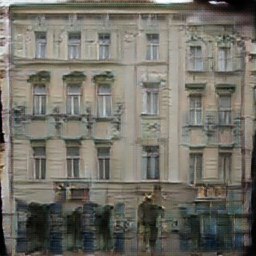

In [41]:
result_img = cv2.imread(results_directory + '100_fake_B.png')
cv2_imshow(result_img)

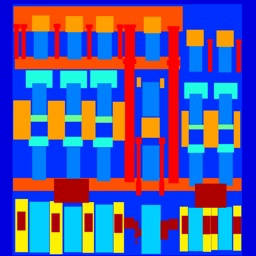

In [42]:
result_img = cv2.imread(results_directory + '100_real_A.png')
cv2_imshow(result_img)

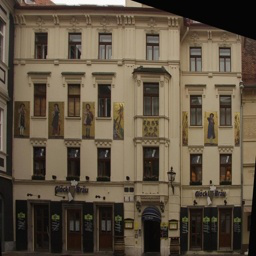

In [43]:
result_img = cv2.imread(results_directory + '100_real_B.png')
cv2_imshow(result_img)

In [44]:
model_name = 'edges2shoes'
model_directory = './checkpoints/{}_pretrained/'.format(model_name)
!mkdir -p {model_directory}

In [45]:
url_model = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(model_name)
!wget -N {url_model}

--2023-07-03 09:32:58--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘edges2shoes.pth’

edges2shoes.pth     100%[===================>] 207.62M  53.7MB/s    in 6.9s    

2023-07-03 09:33:05 (30.3 MB/s) - ‘edges2shoes.pth’ saved [217704688/217704688]



In [46]:
!mv {model_name}.pth {model_directory}latest_net_G.pth

In [47]:
!mkdir -p images/test/

In [48]:
!python test.py --dataroot ./images --name {model_name}_pretrained --model test --dataset_mode single --netG unet_256 --norm batch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./images                      	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [49]:
results_directory = './results/{}_pretrained/test_latest/images/'.format(model_name)